In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

In [3]:
sys.path.insert(1, '../src')
from plant import Plant
from sun import Sun
from state import State
import utils
plt.rcParams['figure.figsize'] = [20, 10]

# Toy Model

Toy model for optical part of a solar power tower plant in 2 dimensions for a start.

## Toy Model of the Sun

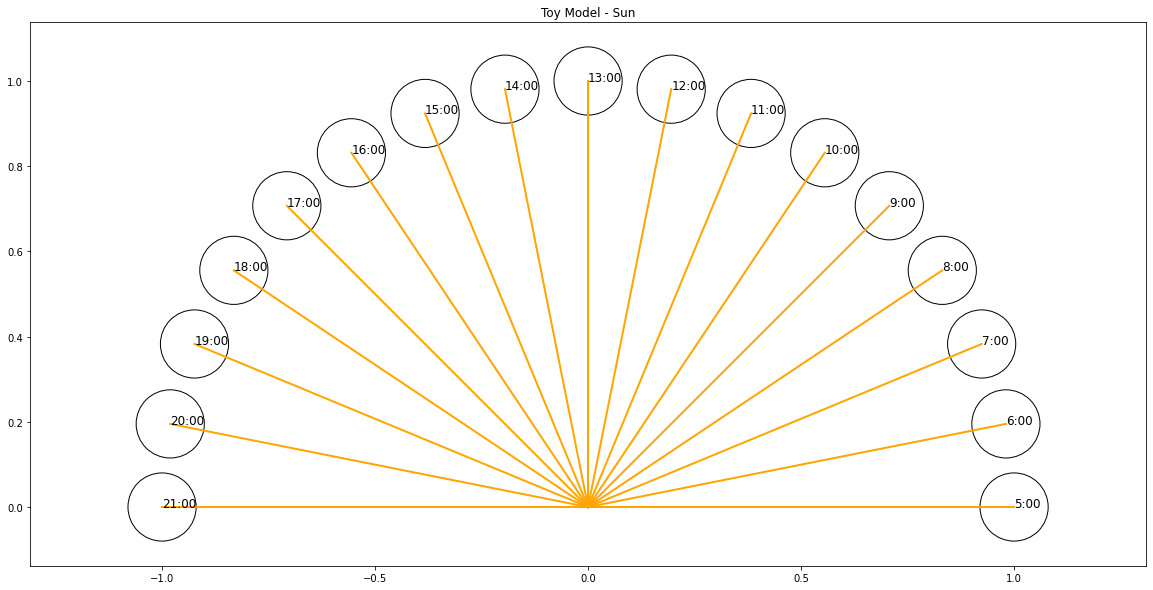

In [4]:
sun = Sun()
sun.draw()

## Plant and Layout Descriptions

Initialize some plant with some layout. See descriptions in `../data/plants/` and `../data/layouts/` in JSON format.

Tiny Plant: 

	- field area:
		- [x_min, x_max] = [0.00, 35.00]
		- [y_min, y_max] = [0.00, 10.00]
		- diameter = 36.40
		- max_ij = 10.00

	- receiver: 
		- _height = 12.00
		- _angle = 80.00
		- _size = 4.00

	- heliostats:
		- number of heliostats n = 1.00
		- heli_size = 4.00
		- heli_rays = 5.00
		- layout = [[15.00, 5.00], ..., [15.00, 5.00]]

True


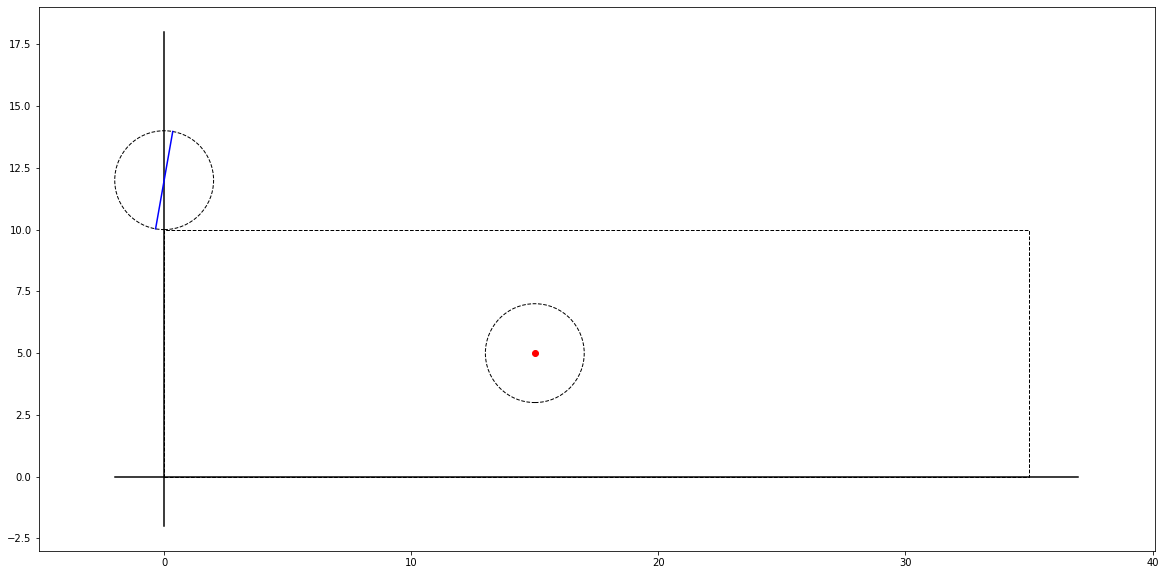

In [5]:
plant = Plant([[15, 5]])
print(plant)
print(plant.valid_layout)
plant.draw()

Effects on heliostat 0: 

	* eta_aa = 0.991269
	* eta_cos = 0.843471
	* eta_sbm = 1.000000
	* received_rays / all_rays = 5 / 5
	* [not-shaded, not-blocked, not-missed] / all_rays = [5 5 5] / 5



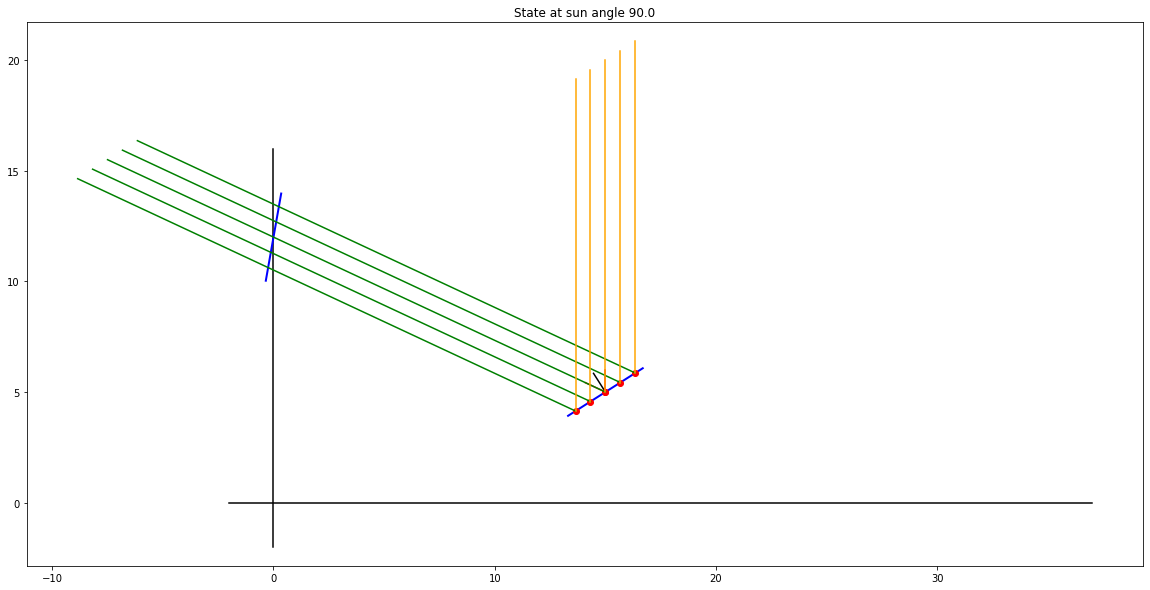

In [6]:
state = State(plant, sun_angle=np.radians(90))
effects = state.get_effects(i=0, verbose=True)
state.draw(i=0)

## Evaluation


	- energy = 12.62570059047674853048

	         mu_aa   mu_cos  mu_sbm
	- etas:  0.9913, 0.7492, 1.0000

	         pi_sha  pi_blo  pi_mis
	- sbms:  0.0000, 0.0000, 0.0000



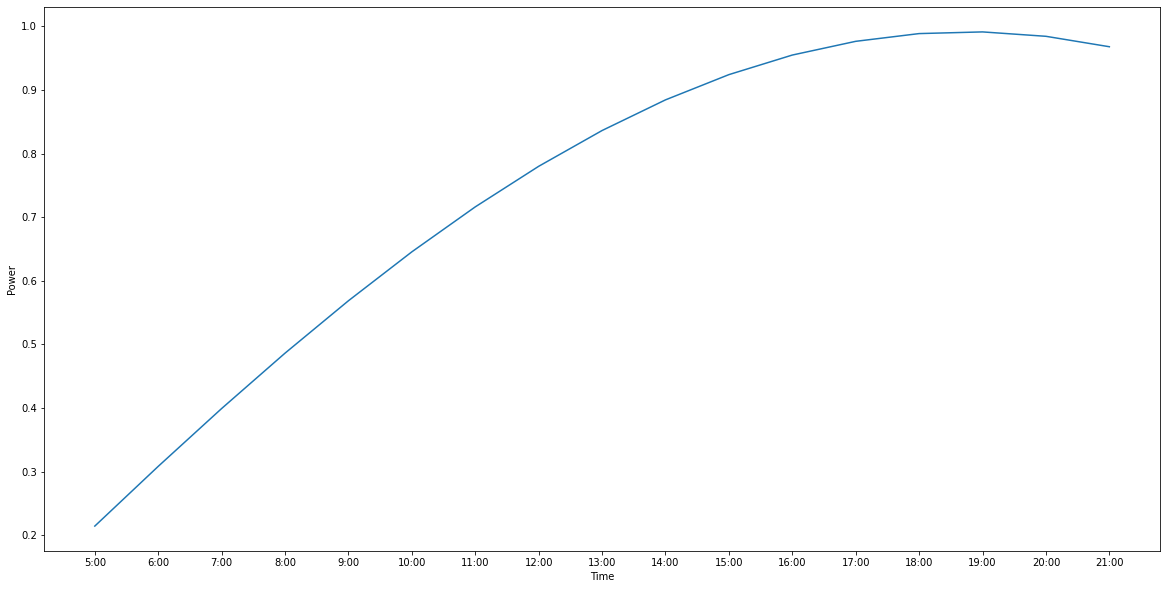

,time,power,mu_aa,mu_cos,mu_sbm,pi_sha,pi_blo,pi_mis
0,5:00,0.214693,0.991269,0.216584,1.0,0.0,0.0,0.0
1,6:00,0.308514,0.991269,0.311231,1.0,0.0,0.0,0.0
2,7:00,0.399364,0.991269,0.402882,1.0,0.0,0.0,0.0
3,8:00,0.486368,0.991269,0.490652,1.0,0.0,0.0,0.0
4,9:00,0.568688,0.991269,0.573697,1.0,0.0,0.0,0.0
5,10:00,0.645531,0.991269,0.651217,1.0,0.0,0.0,0.0
6,11:00,0.716158,0.991269,0.722466,1.0,0.0,0.0,0.0
7,12:00,0.779887,0.991269,0.786757,1.0,0.0,0.0,0.0
8,13:00,0.836106,0.991269,0.843471,1.0,0.0,0.0,0.0
9,14:00,0.884273,0.991269,0.892061,1.0,0.0,0.0,0.0


In [7]:
energy, stats_df, powers = utils.get_energy(plant, do_stats=True)
utils.draw(plant, powers)
stats_df